<a href="https://colab.research.google.com/github/leandrocarrinho/leandrocarrinho/blob/main/Nova_Analise_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Bibliotecas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install catboost
import catboost
from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


###Carrenado Arquivos

In [5]:
train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')

###Analisando os Dados de Treino

In [6]:
train.shape

(891, 12)

In [7]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
train.loc[train.Embarked.isnull(),'Embarked'] = 'S'

In [13]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [16]:
df = pd.DataFrame()

In [17]:
df['PassengerId'] = train['PassengerId']

In [18]:
df

,PassengerId
0,1
1,2
2,3
3,4
4,5
...,...
886,887
887,888
888,889
889,890


In [19]:
df['Embarked'] = train['Embarked']
df['Pclass'] = train['Pclass']
df['Name'] = train['Name']
df['Sex'] = train['Sex']

In [20]:
df

,PassengerId,Embarked,Pclass,Name,Sex
0,1,S,3,"Braund, Mr. Owen Harris",male
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,S,3,"Heikkinen, Miss. Laina",female
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,S,3,"Allen, Mr. William Henry",male
...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male
887,888,S,1,"Graham, Miss. Margaret Edith",female
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,890,C,1,"Behr, Mr. Karl Howell",male


In [21]:
idade_media = train['Age'].mean()
idade_media

29.69911764705882

In [22]:
train.loc[train.Age.isnull(),'Age'] = idade_media

In [23]:
df['Age'] = train['Age']
df

,PassengerId,Embarked,Pclass,Name,Sex,Age
0,1,S,3,"Braund, Mr. Owen Harris",male,22.000000
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000
2,3,S,3,"Heikkinen, Miss. Laina",female,26.000000
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000
4,5,S,3,"Allen, Mr. William Henry",male,35.000000
...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.000000
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.000000
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118
889,890,C,1,"Behr, Mr. Karl Howell",male,26.000000


In [24]:
df.isnull().sum()

PassengerId    0
Embarked       0
Pclass         0
Name           0
Sex            0
Age            0
dtype: int64

In [25]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
test[test.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
idade_media2 = test['Age'].mean()
idade_media2

30.272590361445783

In [28]:
test.loc[test.Age.isnull(),'Age'] = idade_media2

In [29]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
df2 = pd.DataFrame()

In [31]:
df2['PassengerId'] = test['PassengerId']
df2['Age'] = test['Age']
df2['Embarked'] = test['Embarked']
df2['Pclass'] = test['Pclass']
df2['Name'] = test['Name']
df2['Sex'] = test['Sex']

In [32]:
df2


,PassengerId,Age,Embarked,Pclass,Name,Sex
0,892,34.50000,Q,3,"Kelly, Mr. James",male
1,893,47.00000,S,3,"Wilkes, Mrs. James (Ellen Needs)",female
2,894,62.00000,Q,2,"Myles, Mr. Thomas Francis",male
3,895,27.00000,S,3,"Wirz, Mr. Albert",male
4,896,22.00000,S,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female
...,...,...,...,...,...,...
413,1305,30.27259,S,3,"Spector, Mr. Woolf",male
414,1306,39.00000,C,1,"Oliva y Ocana, Dona. Fermina",female
415,1307,38.50000,S,3,"Saether, Mr. Simon Sivertsen",male
416,1308,30.27259,S,3,"Ware, Mr. Frederick",male


###Finalizando Análise

In [33]:
train['Survived'] = train['Survived'].astype(int)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [52]:
x = train.drop('Sex', axis = 1)
y = train['Sex']


In [53]:
def func_treino(algoritmo, x_train, y_train, vc):
  modelo = algoritmo.fit(x_train, y_train)
  acuracia = round(modelo.score(x_train, y_train) * 100, 2)

  train_pred = model_selection.cross_val_predict(algoritmo, x_train, y_train, cv = vc, n_jobs = -1)
  acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

  return acuracia, acuracia_vc

Quantidade de valores unicos: 2

Quais são os valores unicos: ['male' 'female']

Quantidade de valores nulos: 0

Quantidade por opção: 
male      577
female    314
Name: Sex, dtype: int64


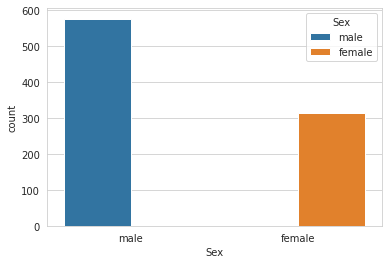

In [54]:
def titanic_func(data, column, count = True):
  print(f'Quantidade de valores unicos: {data[column].nunique()}')
  print(f'\nQuais são os valores unicos: {data[column].unique()}')
  print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
  print(f'\nQuantidade por opção: \n{data[column].value_counts()}')

  if count == True:
    sns.countplot(data = data,x = column, hue = 'Sex')
  else:
    sns.displot(data[column], kde = True)

titanic_func(df, 'Sex')

In [56]:
df

,PassengerId,Embarked,Pclass,Name,Sex,Age
0,1,S,3,"Braund, Mr. Owen Harris",male,22.000000
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000
2,3,S,3,"Heikkinen, Miss. Laina",female,26.000000
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000
4,5,S,3,"Allen, Mr. William Henry",male,35.000000
...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.000000
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.000000
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118
889,890,C,1,"Behr, Mr. Karl Howell",male,26.000000
